In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = Graph.Read_Ncol("CA-GrQc.txt", directed = False)
with open('redes e centralidades/centralidades-CA-GrQc-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)

In [3]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.015455065827132226, 0.01507345926349933, 0.014691852699866437, 0.014691852699866437, 0.012974623163518412, 0.012974623163518412, 0.012783819881701965, 0.012593016599885518, 0.01240221331806907, 0.012020606754436176] 

[0.037027150433897676, 0.025689005573850524, 0.02548841805451102, 0.024970551728636943, 0.02465268472568471, 0.024422231614460273, 0.023502736469008908, 0.022354920330838166, 0.01973105873743096, 0.01799856257605194] 

[0.0014490971768021375, 0.0013424321842951804, 0.0013051988727175994, 0.0011726979586704827, 0.0011530796410060256, 0.0011525013798569384, 0.0010955055684832263, 0.0010817022383064116, 0.0010707262344219872, 0.0010694642052812603] 

[0.19428463503141283, 0.18953808583111678, 0.18903821471838708, 0.18896237842386998, 0.18712852106232164, 0.18654622580583352, 0.18598852330314233, 0.18560115626896184, 0.18530908453426106, 0.18475874375871945] 

[0.15556149399531624, 0.15357400608863453, 0.15307164040970483, 0.15119360119177247, 0.15090290411709814, 0.150407

In [4]:
len(centralidade_list)

7

In [5]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(5242, 7)

In [6]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

99.9999996172
(array([1.]), 1)
(array([23026.39863542]), 1)


In [7]:
lista_teste = teste.tolist()
len(lista_teste)
#  a partir daqui é so pegar os index igual no que ja tem
pca_values = []
for sublist in lista_teste:
    for item in sublist:
        pca_values.append(item)
        
len(pca_values)
# print(flat_list[:50])

5242

In [8]:
a = np.array(pca_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(5242, 8)

In [9]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all(0-6)']
labels_medidas

['0_grau',
 '1_betweennes',
 '2_pagerank',
 '3_closeness',
 '4_eigenvector_centrality',
 '5_harmonic_centrality',
 '6_load_centrality',
 '7_PCA_all(0-6)']

In [10]:
#  A partir daqui analise de correlacao entre as medidas

In [11]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

In [12]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

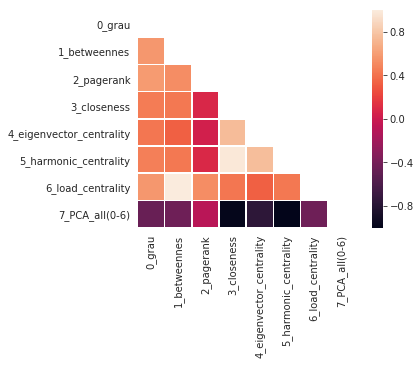

In [13]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

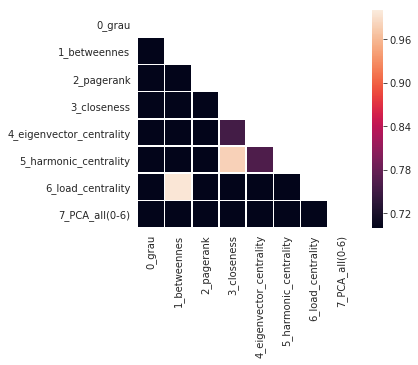

In [14]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmin=.7,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

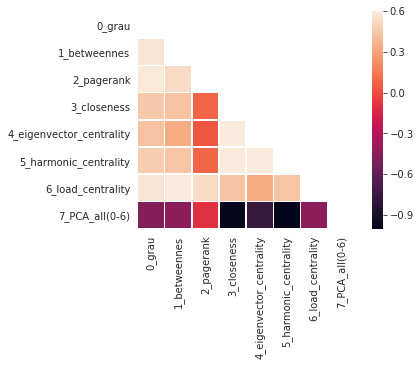

In [15]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax = .6,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [16]:
matrix_teste = X

In [17]:
# Alta correlacao CA-GRQC

c_1_6 = calcula_PCA(matrix_teste,1,6)
c_3_4 = calcula_PCA(matrix_teste,3,4)
c_3_5 = calcula_PCA(matrix_teste,3,5)
c_4_5 = calcula_PCA(matrix_teste,4,5)


99.9970189147
93.8661928864
99.9999999641
99.9999997876


In [18]:
# Baixa correlacao CA-GRQC
c_2_3 = calcula_PCA(matrix_teste,2,3)
c_2_4 = calcula_PCA(matrix_teste,2,4)
c_2_5 = calcula_PCA(matrix_teste,2,5)



99.0462322566
89.5294665567
99.9999999685


In [19]:
#  adicionando na matrix temporaria CA-GRQC
matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_4_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_2_5[1]]).transpose()))
matrix_teste.shape



(5242, 15)

In [62]:
# olhando correlacao das novas medidas da matrix teste

In [20]:
# Ca-GRQC
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','34','35','45','23','24','25']



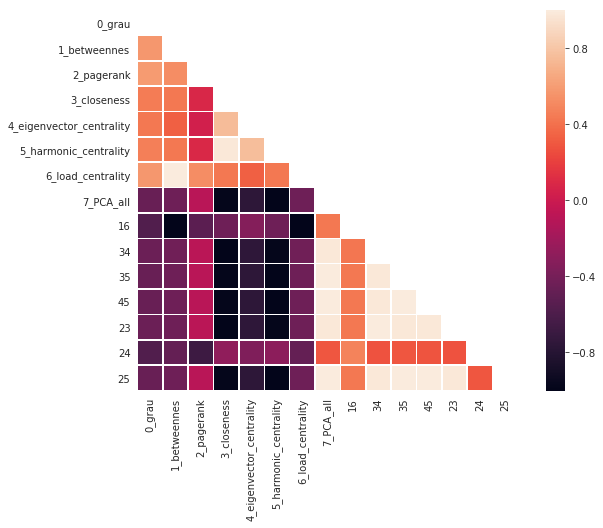

In [21]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [22]:
import pandas as pd


In [25]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [29]:
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'7_PCA_all':seeds_PCA[:100],
     'm_1_6':c_1_6[0][:100],
     'm_34':c_3_4[0][:100],'m_35':c_3_5[0][:100],
     'm_45':c_4_5[0][:100],
     'm_23':c_2_3[0][:100],
     'm_24':c_2_4[0][:100],'m_25':c_2_5[0][:100]}

In [30]:
df = pd.DataFrame(data=d)
df.head()

,0_grau,1_betweennes,2_pagerank,3_closeness,4_eigenvector_centrality,5_harmonic_centrality,6_load_centrality,7_PCA_all,m_1_6,m_23,m_24,m_25,m_34,m_35,m_45
0,101,1037,108,1037,101,1037,1037,5111,5,5,5,5111,5,5111,5111
1,295,11,1037,147,265,288,207,5238,5241,5111,4794,5238,5111,5238,5238
2,279,207,577,11,279,101,11,5237,5240,5238,4224,5237,5238,5237,5237
3,103,53,11,288,296,279,53,5236,5239,5237,3602,5236,5237,5236,5236
4,77,577,186,244,77,11,20,5235,5238,5236,4795,5235,5236,5235,5235


In [32]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_PCA[:50],c_1_6[0][:50],
    c_3_4[0][:50],c_3_5[0][:50],c_4_5[0][:50],
     c_2_3[0][:50],c_2_4[0][:50],
     c_2_5[0][:50]]
with open('sementes-CA-GrQc.txt', 'wb') as f:
    pickle.dump(s, f)